In [ ]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

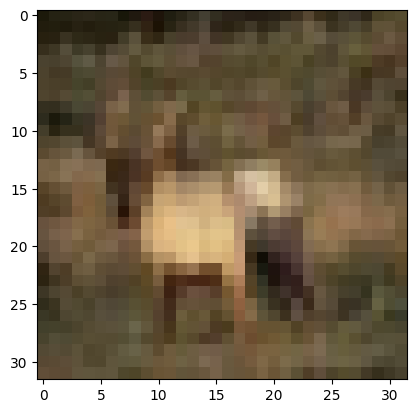

In [ ]:
import matplotlib.pyplot as plt
image=X_train[3]
plt.imshow(image)
plt.show()

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="valid",
                          activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(48, (3, 3), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(48, (3, 3), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 48)          │          13,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 48)            │          20,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          19,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,062 (297.12 KB)

 Trainable params: 76,062 (297.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(patience=5)]

In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 50,
                    validation_data = (X_test, y_test),
                    callbacks=callbacks)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 43ms/step - accuracy: 0.3188 - loss: 1.7970 - val_accuracy: 0.5137 - val_loss: 1.3438
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.5554 - loss: 1.2425 - val_accuracy: 0.5958 - val_loss: 1.1289
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.6199 - loss: 1.0723 - val_accuracy: 0.6359 - val_loss: 1.0221
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6595 - loss: 0.9657 - val_accuracy: 0.6409 - val_loss: 1.0213
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.6907 - loss: 0.8766 - val_accuracy: 0.6586 - val_loss: 0.9833
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.7178 - loss: 0.8101 - val_accuracy: 0.6697 - val_loss: 0.9645
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7295 - loss: 0.7695 - val_accuracy: 0.6893 - val_loss: 0.9025
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.7508 -

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch

<ipython-input-7-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
def buil_model(hp):
  model = keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(hp.Int('input_units',
                          min_value=64,
                          max_value=216,
                          step=32), (3, 3), input_shape=X_train.shape[1:]))

  model.add(Conv2D(hp.Int('input_units1',
                          min_value=64,
                          max_value=216,
                          step=32), (3, 3)))

  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())

  hp_dense1 = hp.Int('l1', min_value = 128, max_value = 512, step = 32)
  model.add(keras.layers.Dense(units = hp_dense1, activation='relu'))

  hp_dense2 = hp.Int('l2', min_value = 128, max_value = 512, step = 32)
  model.add(keras.layers.Dense(units = hp_dense2, activation='relu'))

  hp_lr = hp.Choice('learning_rate', values=[0.001, 0.0001])

  model.add(keras.layers.Dense(10, activation='softmax'))

  model.compile(optimizer="adam",
                loss = "sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

In [ ]:
import kerastuner

In [ ]:
tuner = RandomSearch(
    buil_model,
    objective = kerastuner.Objective('val_accuracy', direction = 'max'),
    max_trials=5,
    executions_per_trial=2,
    directory="/content/drive.MyDrive/Colab Notebooks/TensorFlow",
    project_name="cnn_tuner"
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data = (X_test, y_test))

Trial 5 Complete [00h 02m 43s]
val_accuracy: 0.6708999872207642

Best val_accuracy So Far: 0.6921499967575073
Total elapsed time: 00h 17m 34s


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
input_units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 216, 'step': 32, 'sampling': 'linear'}
input_units1 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 216, 'step': 32, 'sampling': 'linear'}
l1 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
l2 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.results_summary()

Results summary
Results in /content/drive.MyDrive/Colab Notebooks/TensorFlow/cnn_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
input_units: 128
input_units1: 128
l1: 288
l2: 416
learning_rate: 0.0001
Score: 0.6921499967575073

Trial 1 summary
Hyperparameters:
input_units: 64
input_units1: 160
l1: 128
l2: 160
learning_rate: 0.001
Score: 0.6796999871730804

Trial 3 summary
Hyperparameters:
input_units: 128
input_units1: 160
l1: 448
l2: 352
learning_rate: 0.0001
Score: 0.6796500086784363

Trial 2 summary
Hyperparameters:
input_units: 192
input_units1: 160
l1: 352
l2: 448
learning_rate: 0.0001
Score: 0.6732999980449677

Trial 4 summary
Hyperparameters:
input_units: 192
input_units1: 64
l1: 224
l2: 192
learning_rate: 0.001
Score: 0.6708999872207642


In [ ]:
final_model = tuner.get_best_models(num_models=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_model = final_model[0]

In [ ]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 288)                 │       7,225,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 416)                 │         120,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           4,170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,501,194 (28.61 MB)

 Trainable params: 7,501,194 (28.61 MB)

 Non-trainable params: 0 (0.00 B)